In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [10]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [21]:
NUM_CLASSES = 5

# Dataset reading

In [22]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [23]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [26]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_4 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [28]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [29]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0891 - loss: 1.8102
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.0915 - loss: 1.8039 - val_accuracy: 0.1090 - val_loss: 1.6170
Epoch 2/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1812 - loss: 1.6323 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1874 - loss: 1.6278 - val_accuracy: 0.3088 - val_loss: 1.5508
Epoch 3/1000
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3054 - loss: 1.5506 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3086 - loss: 1.5461 - val_accuracy: 0.4131 - val_loss: 1.4798
Epoch 4/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3602 - loss: 1.4758 
Epoch 4: saving model to model/keypoint_classifier/keypoint_c

In [30]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9731 - loss: 0.2124 


In [31]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [32]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
[9.2761552e-01 6.9690503e-02 2.6085267e-03 8.0684600e-05 4.8997622e-06]
0


# Confusion matrix

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


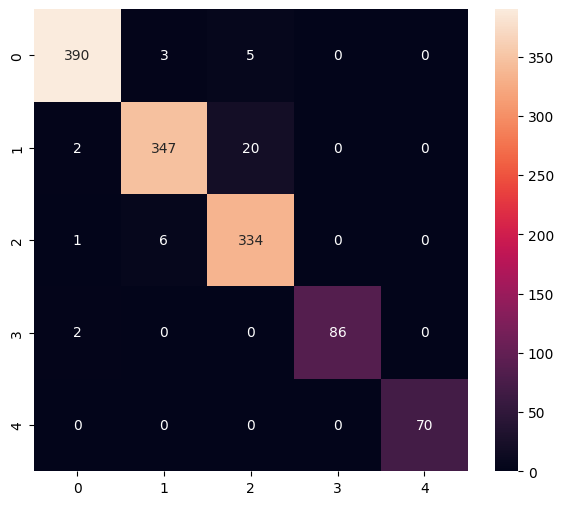

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       398
           1       0.97      0.94      0.96       369
           2       0.93      0.98      0.95       341
           3       1.00      0.98      0.99        88
           4       1.00      1.00      1.00        70

    accuracy                           0.97      1266
   macro avg       0.98      0.98      0.98      1266
weighted avg       0.97      0.97      0.97      1266



In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [34]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [35]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Neel\AppData\Local\Temp\tmp0xc5vpd1\assets


INFO:tensorflow:Assets written to: C:\Users\Neel\AppData\Local\Temp\tmp0xc5vpd1\assets


Saved artifact at 'C:\Users\Neel\AppData\Local\Temp\tmp0xc5vpd1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2252591621200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2252591622352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2252591621392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2252591620816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2252591620432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2252591622736: TensorSpec(shape=(), dtype=tf.resource, name=None)


6584

# Inference test

In [36]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [37]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [38]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [39]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [40]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.2761552e-01 6.9690458e-02 2.6085218e-03 8.0684600e-05 4.8997576e-06]
0
